In [1]:
sukinda = '/Users/angus/work/sukinda/lab_work/cations/raw_data/2025_01_09_Angus_River_waters.csv'
deccan_soils = '/Users/angus/work/sukinda/lab_work/cations/raw_data/2025_01_13_ANGUS_RIVER_WATERS.csv'

soils = '../../data/raw_data/soils_sukinda_diluted10Mar25.csv'

file_paths = [sukinda, deccan_soils]
file_names = ['data/sukinda.nc', 'data/deccan_soils.nc']

#%run '../refactor/refactor.py' '/Users/angus/work/sukinda/lab_work/cations/raw_data/2025_01_13_ANGUS_RIVER_WATERS.csv' 'refactored.nc' 

In [2]:
conversion_factors = {
    "Al": 1 / 26.9815,   # ≈ 0.03704
    "Sb": 1 / 121.76,    # ≈ 0.00821
    "As": 1 / 74.9216,   # ≈ 0.01335
    "Ba": 1 / 137.327,   # ≈ 0.00728
    "Be": 1 / 9.0122,    # ≈ 0.11098
    "Cd": 1 / 112.411,   # ≈ 0.00890
    "Ca": 1 / 40.078,    # ≈ 0.02495
    "Cr": 1 / 51.9961,   # ≈ 0.01923
    "Co": 1 / 58.9332,   # ≈ 0.01697
    "Cu": 1 / 63.546,    # ≈ 0.01574
    "Fe": 1 / 55.845,    # ≈ 0.01790
    "Pb": 1 / 207.2,     # ≈ 0.00483
    "Mg": 1 / 24.305,    # ≈ 0.04116
    "Mn": 1 / 54.9380,   # ≈ 0.01820
    "Mo": 1 / 95.95,     # ≈ 0.01042
    "Ni": 1 / 58.6934,   # ≈ 0.01704
    "K": 1 / 39.0983,    # ≈ 0.02559
    "Na": 1 / 22.9898,   # ≈ 0.04348
    "Sr": 1 / 87.62,     # ≈ 0.01141
    "U": 1 / 238.03,     # ≈ 0.00420
    "V": 1 / 50.9415,    # ≈ 0.01963
    "Zn": 1 / 65.38      # ≈ 0.01529
}

In [ ]:
import sys
import os

# Adjust the path to point to your src directory
sys.path.insert(0, os.path.abspath('../../src'))
# Define conversion factors: element -> atomic weight.
from refactor.refactor import ConcentrationAnalyser
from refactor.check_stds import check_standards

# Create an instance of ConcentrationAnalyser with the dummy raw dataset.
analyser = ConcentrationAnalyser.from_csv(soils)

certified_values = check_standards()
# Run the analysis pipeline:
analyser.drop_extraneous_vars()\
    .compute_calibration_stats(['SLRS-6', 'SPS-SW2 10%', 'nist1060a'])\
    .compute_error_estimates(certified_values)\
    .get_results()\
    .aggregate_by_element()\
    .save_data('soils_march.nc')


Results saved to soils_march.nc


In [4]:
analyser.results['calibration_stats'].sel(species=['Si 250.690 R',
       'Si 251.611 Ax', 'Si 251.611 R', 'Si 288.158 Ax', 'Si 288.158 R'])

<xarray.Dataset> Size: 13kB
Dimensions:                    (check_std: 2, species: 5, sample_name: 124)
Coordinates:
  * check_std                  (check_std) object 16B 'SLRS-6' 'SPS-SW2 10%'
  * species                    (species) <U13 260B 'Si 250.690 R' ... 'Si 288...
  * sample_name                (sample_name) <U15 7kB 'A' 'BW' ... 'Tap-0305'
Data variables:
    calibration_mean_ppm       (check_std, species) float64 80B 2.524 ... 0.5678
    calibration_sd_ppm         (check_std, species) float64 80B 0.03331 ... 0...
    calibration_error_ppm_max  (sample_name, species) float64 5kB nan ... nan

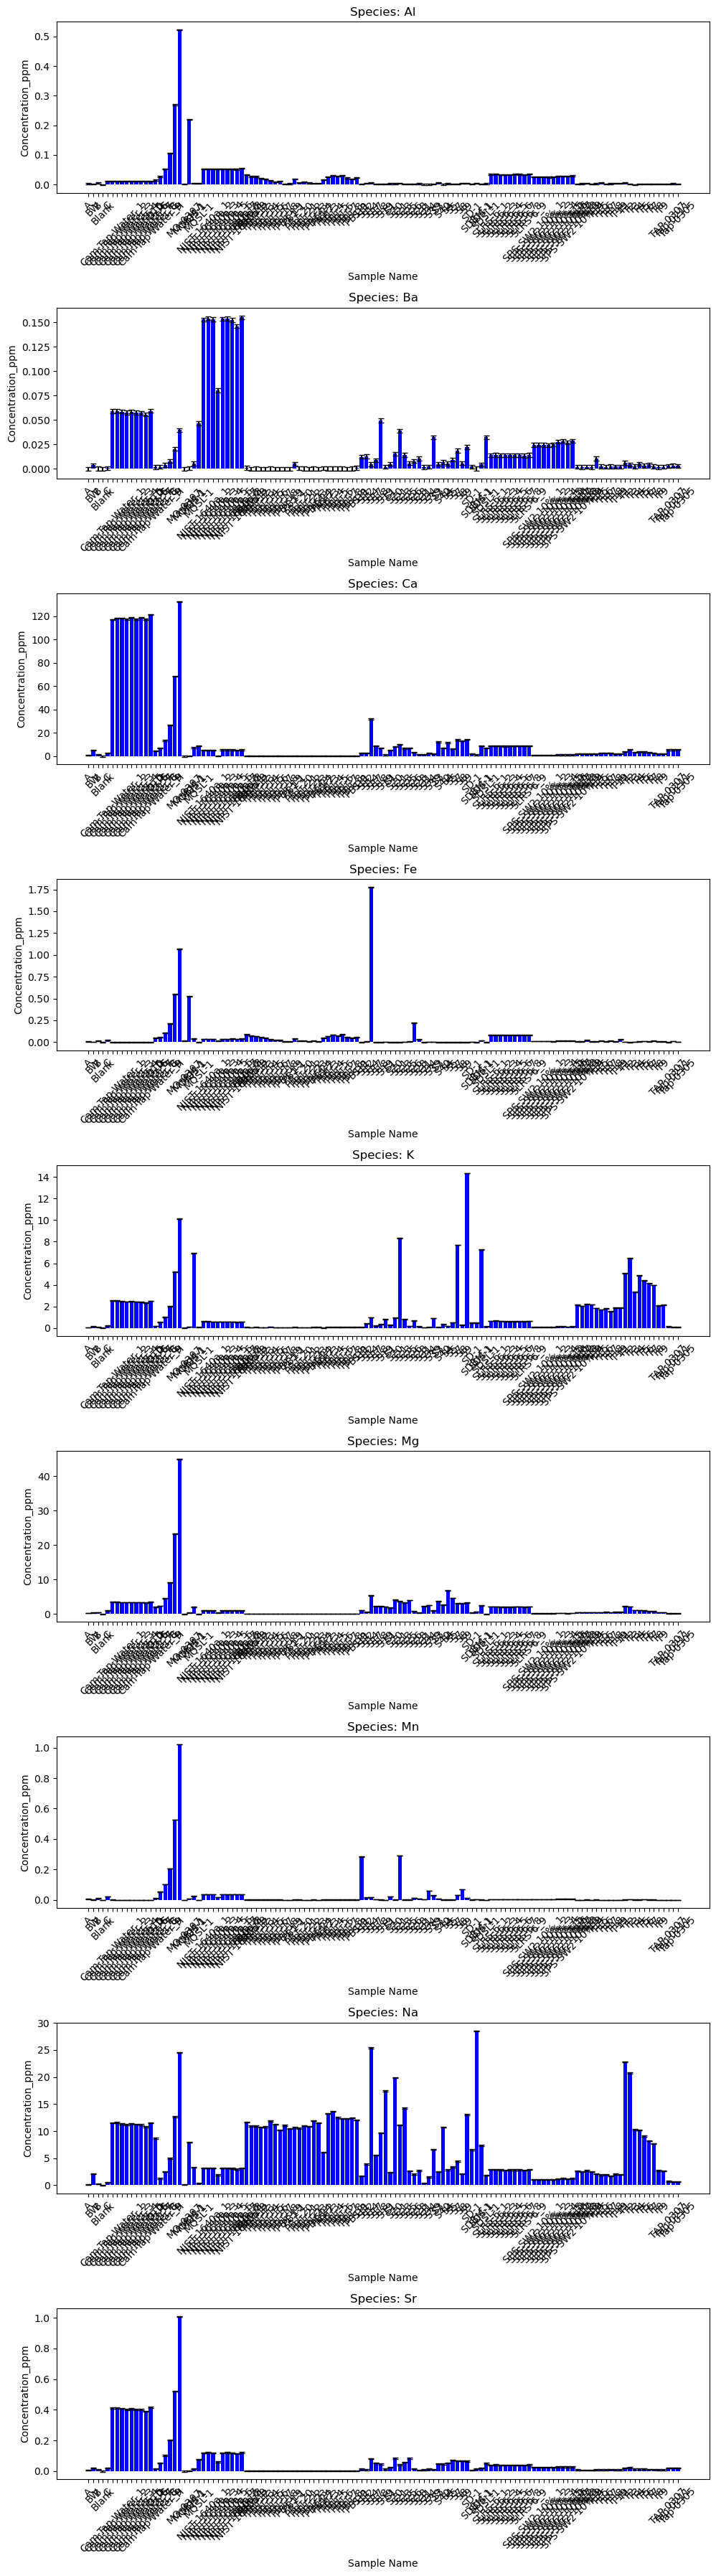

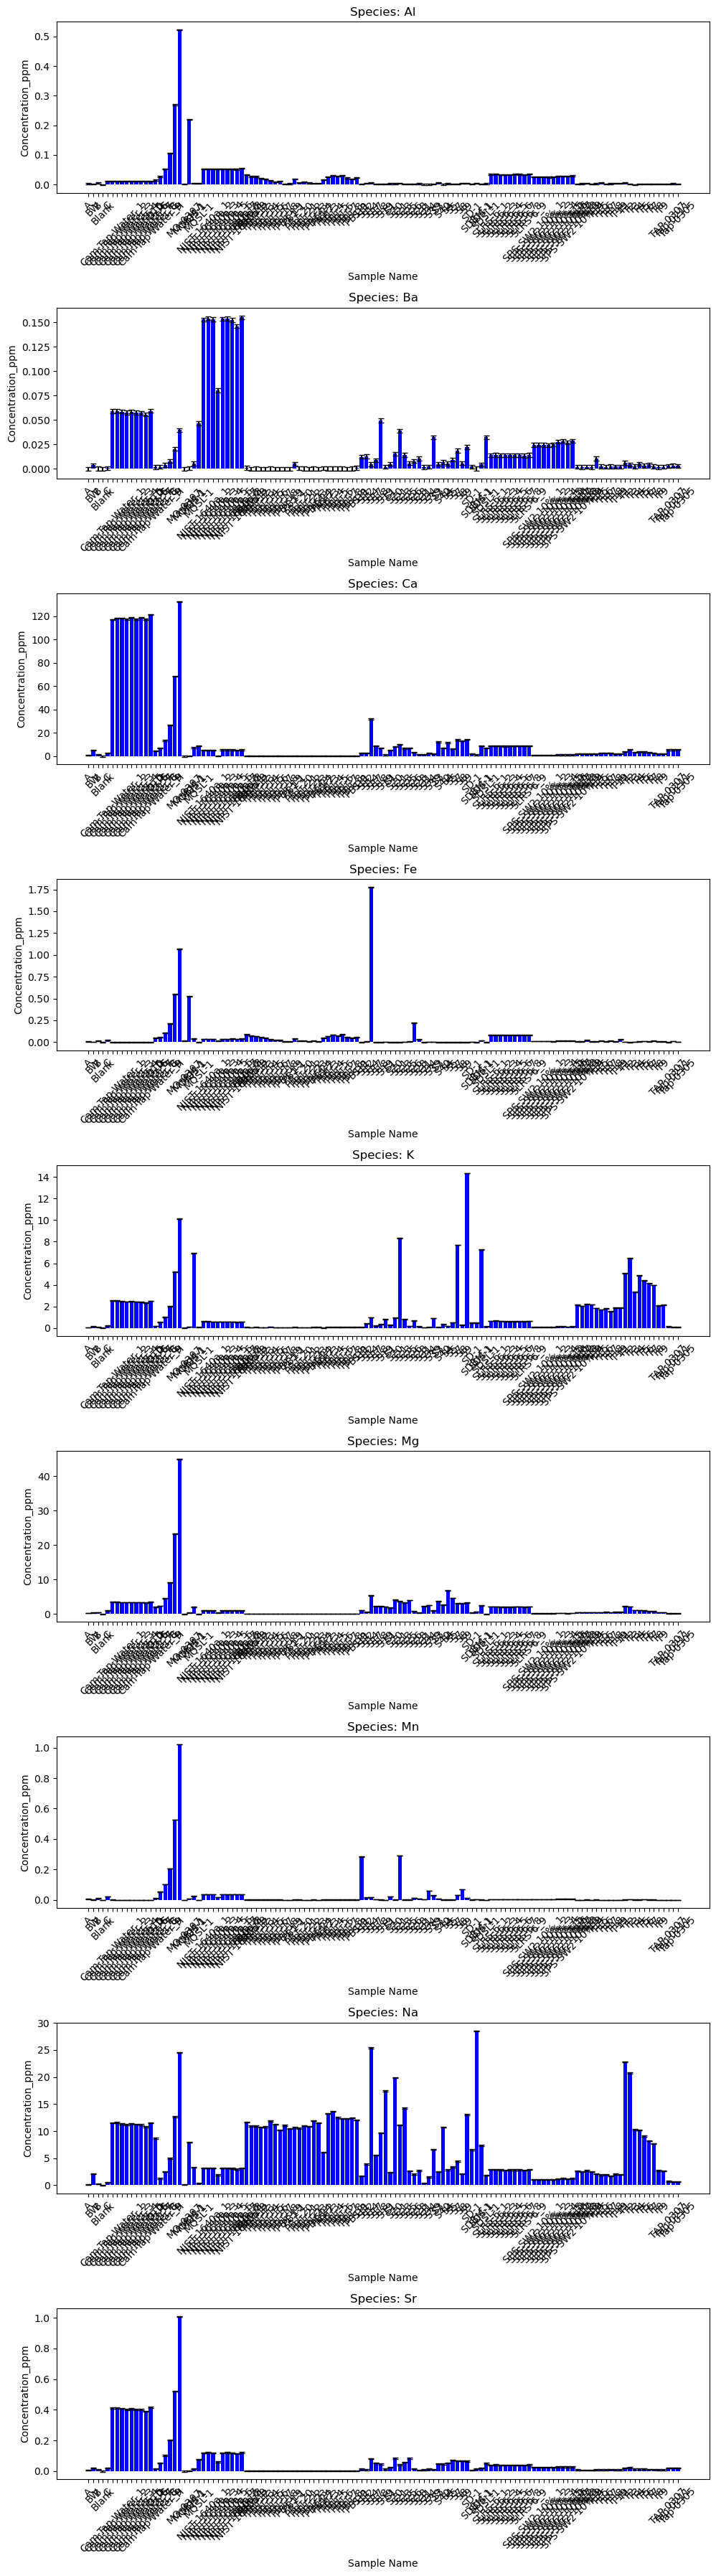

In [5]:
from refactor.visualisation import bar_by_sample, bar_by_species

bar_by_species(analyser.results['aggregated'])

In [6]:
analyser.results['aggregated']

<xarray.Dataset> Size: 25kB
Dimensions:            (element: 9, sample_name: 124)
Coordinates:
  * sample_name        (sample_name) <U15 7kB 'A' 'BW' ... 'Tap-0211' 'Tap-0305'
  * element            (element) object 72B 'Al' 'Ba' 'Ca' ... 'Mn' 'Na' 'Sr'
Data variables:
    Concentration_ppm  (element, sample_name) float64 9kB 0.0027 ... 0.02085
    error              (element, sample_name) float64 9kB 0.001528 ... 0.003459

In [7]:
for chk_std in analyser.check_standards().keys():
    certified_values = analyser.check_standards()[chk_std][0]
    subset_labels = [f'{chk_std}_{i}' for i in range(1, 6)]
    print(subset_labels)
    label_prefix = chk_std
    certified_values = analyser.check_standards()[chk_std][0]

    stats_ds = analyser.append_stats(subset_labels, chk_std)
    # Store the stats in a new attribute
    analyser.results = {}
    analyser.results['stats'] = stats_ds

    # Calculate precentatge difference from certified values
    #analyser.append_percentage_difference(certified_values, chk_std)
    # Append the errors calculated from each check standard to the DataArray
    #analyser.append_error_estimate(chk_std)

AttributeError: 'ConcentrationAnalyser' object has no attribute 'check_standards'